<a href="https://colab.research.google.com/github/MikaZico36/DECDProject/blob/G%C3%A9sero/DecdProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
numeroContratosContador_df = pd.read_csv('https://raw.githubusercontent.com/CarolinaSS98/project_decd/main/contadores-de-energia-atual.csv', sep =";", low_memory=False)
energiaConsumida_df = pd.read_csv('https://raw.githubusercontent.com/CarolinaSS98/project_decd/main/3-consumos-faturados-por-municipio-ultimos-10-anos.csv', sep =";")
numeroOrdensServico_df = pd.read_csv('https://raw.githubusercontent.com/CarolinaSS98/project_decd/main/15-ordens-de-servico.csv', sep =";")

# numeroContratosContador2023_df = numeroContratosContador_df[numeroContratosContador_df['Ano'] == 2023]
# energiaConsumida2023_df = energiaConsumida_df[energiaConsumida_df['Ano'] == 2023]
# numeroOrdensServico2023_df = numeroOrdensServico_df[numeroOrdensServico_df['Ano'] == 2023]


### Tratar Coleção - Número de Contratos Ativos por Tipo de Contador

#### Agregar dados por "data" e "Concelho"

Os números de CPE's foram separados em duas colunas:

- Número de CPEs=SIM : representa o número de CPE's ***com contadores inteligentes***.
- Número de CPEs=NAO : representa o número de CPE's ***sem contadores inteligentes***.

In [3]:
# Filtrando os dados para separar os CPEs com e sem contador inteligente
df_sim = numeroContratosContador_df[numeroContratosContador_df['Inclui contador inteligente'] == 'SIM']
df_nao = numeroContratosContador_df[numeroContratosContador_df['Inclui contador inteligente'] == 'NÃO']

# Agrupando os dados por data e concelho e contando o número de CPEs para cada grupo
contadoresAgregados_df = pd.DataFrame({
    'Num_CPEs_Inteligentes': df_sim.groupby(['data','Concelho'])["Número de CPE's"].sum(),
    'Num_CPEs_Nao_Inteligentes': df_nao.groupby(['data','Concelho'])["Número de CPE's"].sum()
}).reset_index()

contadoresAgregados_df.rename(columns={'data': 'Data'}, inplace=True)

# Imprimindo o DataFrame resultante
contadoresAgregados_df.head(100)
# contadoresAgregados_df.info()

,Data,Concelho,Num_CPEs_Inteligentes,Num_CPEs_Nao_Inteligentes
0,2022-03,Abrantes,13331,11795
1,2022-03,Aguiar da Beira,2331,2587
2,2022-03,Alandroal,1977,2121
3,2022-03,Albergaria-a-Velha,5596,8525
4,2022-03,Albufeira,28711,24554
...,...,...,...,...
95,2022-03,Freixo de Espada À Cinta,1803,1730
96,2022-03,Fronteira,2057,469
97,2022-03,Fundão,17512,6518
98,2022-03,Gavião,1863,1664


### Tratar Coleção - Consumo de Energia Consumida

####Agregar dados por "data" e "Concelho"

O valor de  Energia Ativa (kWh) foi separado em duas colunas:
- **Energia_Ativa_Baixa_Tensao** : represneta o valor de energia consumida com nível de tensão baixo.
- **Energia_Ativa_Outra_Tensao** : represneta o valor de energia consumida com nível de tensão Média, Alta e Muito Alta Tensão

In [4]:
# Filtrando os dados para separar a Energia Consumida por nível de tensão
df_baixa = energiaConsumida_df[energiaConsumida_df['Nível de Tensão'] == "Baixa Tensão"]
df_acimaBaixa = energiaConsumida_df[energiaConsumida_df['Nível de Tensão'] == "Muito Alta, Alta e Média Tensões"]

# Agrupando os dados por data e concelho e sumando o valor de energia consumida por cada um dos grupos
energiaAgregada_df = pd.DataFrame({
    'Energia_Consumida_Baixa_T': df_baixa.groupby(['Data','Concelho'])['Energia Ativa (kWh)'].sum(),
    'Energia_Consumida_Superior_Baixa_T': df_acimaBaixa.groupby(['Data','Concelho'])['Energia Ativa (kWh)'].sum()
}).reset_index()


# Imprimir infor do DataFrame agregado dos consumos
energiaAgregada_df.head()

,Data,Concelho,Energia_Consumida_Baixa_T,Energia_Consumida_Superior_Baixa_T
0,2020-11,Abrantes,6.028607e+06,9.314171e+06
1,2020-11,Aguiar da Beira,1.065748e+06,2.623619e+05
2,2020-11,Alandroal,1.110645e+06,1.498483e+05
3,2020-11,Albergaria-a-Velha,4.153435e+06,1.144006e+07
4,2020-11,Albufeira,1.534018e+07,5.047671e+06


$\color{red}{\text{Este passo é para ser ignorado. A substituição dos valores a Null é feita no data set de teste aquando da sua criação mais abaixo }}$

#### Tratar valores Null Detetados

Dado terem sido detetados valores a NULL nas colunas de Energia Consumida de nível > Baixa Tensão, indica que existem concelhos onde não existe consumo deste nível de tensão.

A forma de tratar estes valores a null é colocá-los com o valor da mediana da coluna.

In [5]:
#mostra quais sao as linhas onde aparecem valores de colunas a NaN
#linhas_valor_null = energiaAgregada_df[energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'].isnull()]
#linhas_valor_null.head()


#linhas_not_null = energiaAgregada_df[energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'].notna()]
#linhas_not_null.info()
#linhas_not_null.head()
#mediana_acimaBaixa = linhas_not_null['Energia_Consumida_Superior_Baixa_T'].median()
#print(mediana_acimaBaixa)
#energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'].fillna(mediana_acimaBaixa, inplace=True)

#energiaAgregada_df.info()

# energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'] = energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'].replace(np.nan, 0)

#energiaAgregada_df.info()

# linhas_valor_zero = energiaAgregada_df[energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'] == 0]

# linhas_valor_zero.head(100)

In [6]:
energiaAgregada_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Data                                11398 non-null  object 
 1   Concelho                            11398 non-null  object 
 2   Energia_Consumida_Baixa_T           11398 non-null  float64
 3   Energia_Consumida_Superior_Baixa_T  11314 non-null  float64
dtypes: float64(2), object(2)
memory usage: 356.3+ KB


### Tratar Coleção - Nº de Ordens de Serviço

####Agregar dados por "data" e "Concelho"

Não nos pareceu relevante agregar por concelho, contado o numero total de ordens de serviço por tipo e por isso vamos diretamente somar o número de ordens de serviço por concelho, ignorando a sua tipologia

In [7]:
numeroOrdensServicoAgregado_df = pd.DataFrame({
    'Numero_total_ordens_servico': numeroOrdensServico_df.groupby(['data','Concelho'])['Ordens Serviço Realizadas (#)'].sum(),
}).reset_index()

numeroOrdensServicoAgregado_df.rename(columns={'data': 'Data'}, inplace=True)

numeroOrdensServicoAgregado_df.head(100)

numeroOrdensServicoAgregado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7227 entries, 0 to 7226
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Data                         7227 non-null   object
 1   Concelho                     7227 non-null   object
 2   Numero_total_ordens_servico  7227 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 169.5+ KB


In [8]:
merged_aux = pd.merge(contadoresAgregados_df,energiaAgregada_df, on=['Data','Concelho'], how='inner')
merged_df = pd.merge(merged_aux,numeroOrdensServicoAgregado_df, on=['Data','Concelho'], how='inner')

merged_df['Ano'] = merged_df.Data.str[:4]
merged_df['Mes'] = merged_df.Data.str[5:]
merged_df = merged_df.drop('Data', axis = 1)

merged_df.Concelho = merged_df.Concelho.astype('category')
merged_df.Mes = merged_df.Mes.astype('category')
merged_df.Ano = merged_df.Ano.astype('category')

In [9]:
# mediana coluna Energia_Consumida_Superior_Baixa_T do conj treino (ano != 2024)
mediana = merged_df[merged_df.Ano != '2024'].Energia_Consumida_Superior_Baixa_T.median()

# imputar valores NA com mediana conj treino
merged_df['Energia_Consumida_Superior_Baixa_T'] = merged_df['Energia_Consumida_Superior_Baixa_T'].replace(np.nan, mediana)

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Concelho                            6825 non-null   category
 1   Num_CPEs_Inteligentes               6825 non-null   int64   
 2   Num_CPEs_Nao_Inteligentes           6825 non-null   int64   
 3   Energia_Consumida_Baixa_T           6825 non-null   float64 
 4   Energia_Consumida_Superior_Baixa_T  6825 non-null   float64 
 5   Numero_total_ordens_servico         6825 non-null   int64   
 6   Ano                                 6825 non-null   category
 7   Mes                                 6825 non-null   category
dtypes: category(3), float64(2), int64(3)
memory usage: 304.1 KB


In [ ]:
display(merged_df)

,Concelho,Num_CPEs_Inteligentes,Num_CPEs_Nao_Inteligentes,Energia_Consumida_Baixa_T,Energia_Consumida_Superior_Baixa_T,Numero_total_ordens_servico,Ano,Mes
0,Abrantes,13331,11795,6.376950e+06,7.157803e+06,150,2022,03
1,Aguiar da Beira,2331,2587,1.074397e+06,2.613668e+05,9,2022,03
2,Alandroal,1977,2121,1.258384e+06,2.074845e+05,23,2022,03
3,Albergaria-a-Velha,5596,8525,4.441889e+06,1.406621e+07,52,2022,03
4,Albufeira,28711,24554,1.840090e+07,7.379642e+06,385,2022,03
...,...,...,...,...,...,...,...,...
6820,Vouzela,6288,1068,7.938707e+05,3.480269e+05,84,2024,03
6821,Águeda,23452,1452,3.444448e+06,4.043627e+06,440,2024,03
6822,Évora,29498,3736,5.373245e+06,3.613598e+06,520,2024,03
6823,Ílhavo,24727,890,2.974763e+06,3.285015e+06,445,2024,03


In [11]:
category_df= merged_df.copy()
category_df['Num_CPEs_Inteligentes'] = pd.cut(category_df['Num_CPEs_Inteligentes'],
                                                      bins=[0,2500,8000,15000,33000, 1000000],
                                                      labels=['Muito Baixo','Baixo', 'Médio', 'Alto','Muito Alto'])


category_df['Num_CPEs_Nao_Inteligentes'] = pd.cut(category_df['Num_CPEs_Nao_Inteligentes'],
                                                      bins=[0,1000,3000,10000,20000, 100000],
                                                      labels=['Muito Baixo','Baixo', 'Médio', 'Alto','Muito Alto'])

category_df['Energia_Consumida_Baixa_T'] = pd.cut(category_df['Energia_Consumida_Baixa_T'],
                                                      bins=[0,700000,1300000,5500000,11000000, 999999999],
                                                      labels=['Muito Baixo','Baixo', 'Médio', 'Alto','Muito Alto'])

category_df['Energia_Consumida_Superior_Baixa_T'] = pd.cut(category_df['Energia_Consumida_Superior_Baixa_T'],
                                                      bins=[0,550000,1200000,4800000, 15000000,999999999],
                                                      labels=['Muito Baixo','Baixo', 'Médio', 'Alto','Muito Alto'])

category_df['Numero_total_ordens_servico'] = pd.cut(category_df['Numero_total_ordens_servico'],
                                                      bins=[0,100,200,1000,5000, 100000],
                                                      labels=['Muito Baixo','Baixo', 'Médio', 'Alto','Muito Alto'])

display(category_df)

,Concelho,Num_CPEs_Inteligentes,Num_CPEs_Nao_Inteligentes,Energia_Consumida_Baixa_T,Energia_Consumida_Superior_Baixa_T,Numero_total_ordens_servico,Ano,Mes
0,Abrantes,Médio,Alto,Alto,Alto,Baixo,2022,03
1,Aguiar da Beira,Muito Baixo,Baixo,Baixo,Muito Baixo,Muito Baixo,2022,03
2,Alandroal,Muito Baixo,Baixo,Baixo,Muito Baixo,Muito Baixo,2022,03
3,Albergaria-a-Velha,Baixo,Médio,Médio,Alto,Muito Baixo,2022,03
4,Albufeira,Alto,Muito Alto,Muito Alto,Alto,Médio,2022,03
...,...,...,...,...,...,...,...,...
6820,Vouzela,Baixo,Baixo,Baixo,Muito Baixo,Muito Baixo,2024,03
6821,Águeda,Alto,Baixo,Médio,Médio,Médio,2024,03
6822,Évora,Alto,Médio,Médio,Médio,Médio,2024,03
6823,Ílhavo,Alto,Muito Baixo,Médio,Médio,Médio,2024,03


#Normalização

**Normalização z-score**

       Num_CPEs_Inteligentes  Num_CPEs_Nao_Inteligentes  \
count           6.825000e+03               6.825000e+03   
mean            8.328706e-18              -1.665741e-17   
std             1.000073e+00               1.000073e+00   
min            -5.294002e-01              -7.619378e-01   
25%            -4.328057e-01              -5.881512e-01   
50%            -3.309679e-01              -3.471496e-01   
75%             3.727009e-02               1.814416e-01   
max             1.160050e+01               7.685801e+00   

       Energia_Consumida_Baixa_T  Energia_Consumida_Superior_Baixa_T  \
count               6.825000e+03                        6.825000e+03   
mean                7.391727e-17                       -3.123265e-17   
std                 1.000073e+00                        1.000073e+00   
min                -5.462264e-01                       -4.877307e-01   
25%                -4.474959e-01                       -4.570371e-01   
50%                -3.325218e-01    

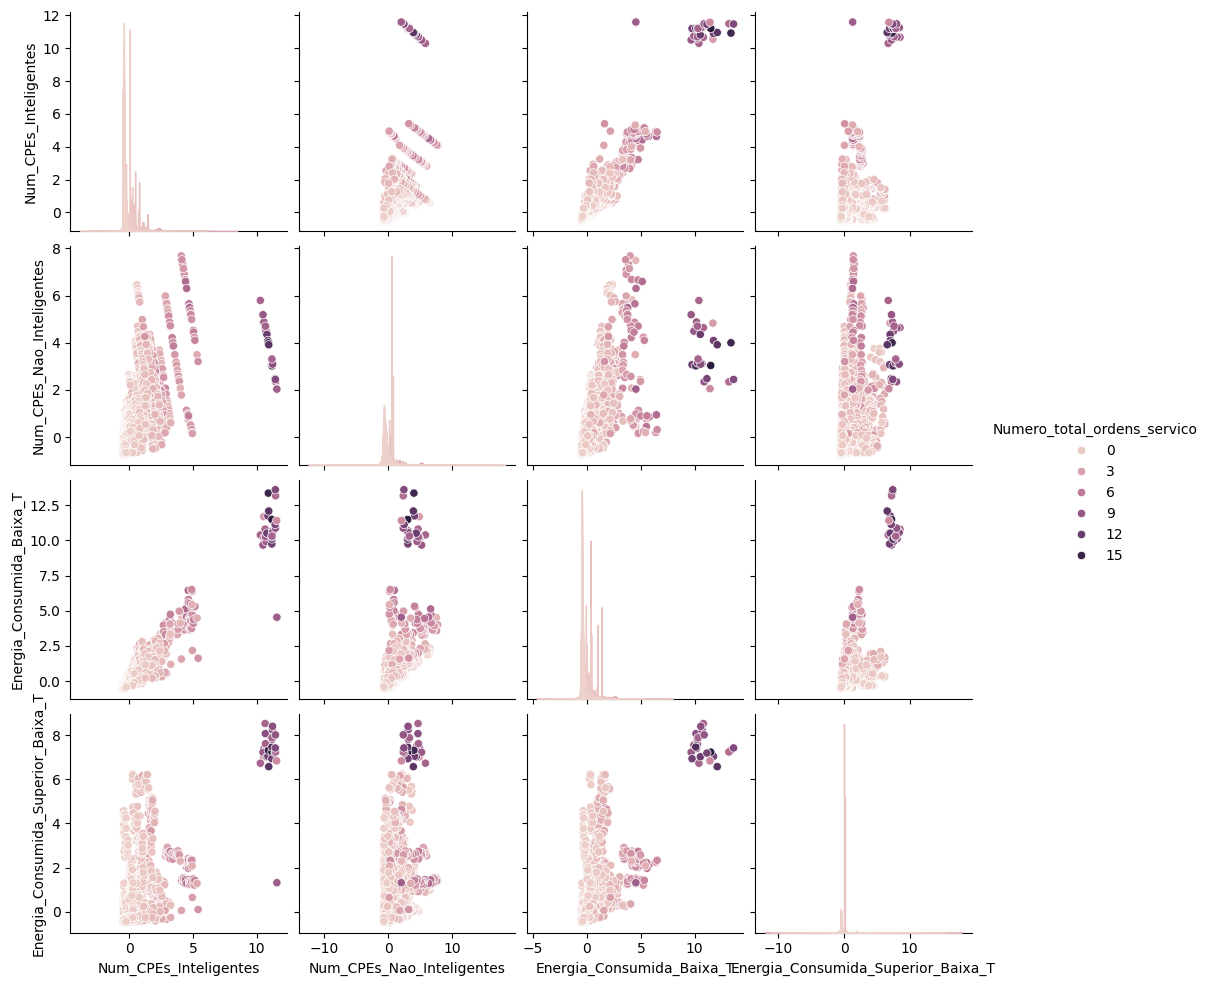

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

cols_to_normalize = [col for col in merged_df.columns if col not in ['Ano', 'Mes', 'Concelho']]
numeric_df_to_normalize = merged_df[cols_to_normalize]
std_scaler = StandardScaler()
std_scaler.fit(numeric_df_to_normalize)
scaled_features = std_scaler.transform(numeric_df_to_normalize)
std_scaled = pd.DataFrame(scaled_features, index=numeric_df_to_normalize.index, columns=numeric_df_to_normalize.columns)
cols_to_keep = ['Ano', 'Mes', 'Concelho']
final_df = pd.concat([merged_df[cols_to_keep], std_scaled], axis=1)
print(final_df.describe())
sns.pairplot(final_df, hue='Numero_total_ordens_servico')

plt.show()


       Num_CPEs_Inteligentes  Num_CPEs_Nao_Inteligentes  \
count            6825.000000                6825.000000   
mean                0.043644                   0.090194   
std                 0.082447                   0.118384   
min                 0.000000                   0.000000   
25%                 0.007963                   0.020572   
50%                 0.016359                   0.049101   
75%                 0.046717                   0.111672   
max                 1.000000                   1.000000   

       Energia_Consumida_Baixa_T  Energia_Consumida_Superior_Baixa_T  \
count                6825.000000                         6825.000000   
mean                    0.038604                            0.054137   
std                     0.070679                            0.111006   
min                     0.000000                            0.000000   
25%                     0.006978                            0.003407   
50%                     0.015103    

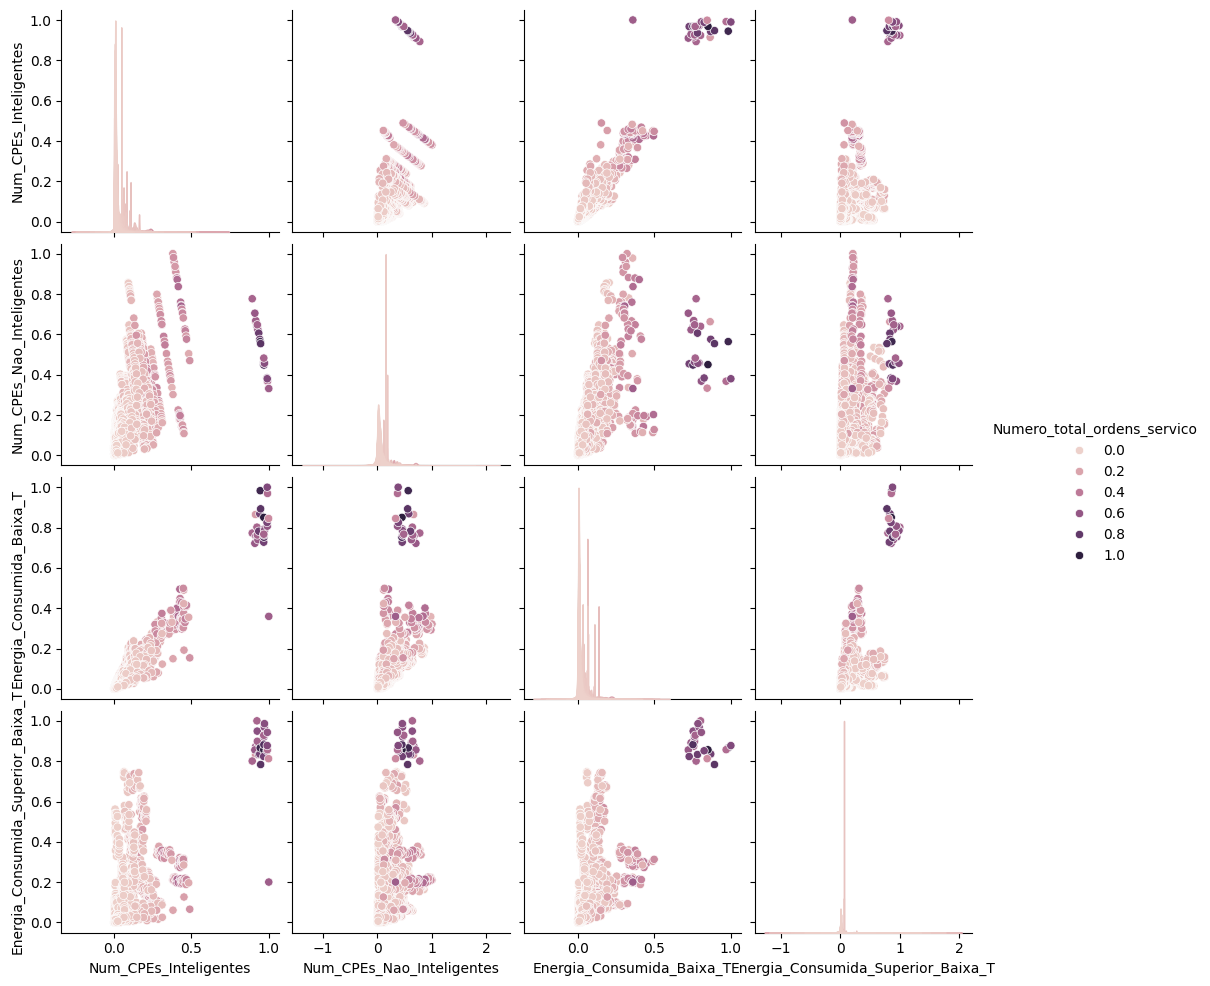

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

cols_to_normalize = [col for col in merged_df.columns if col not in ['Ano', 'Mes', 'Concelho']]
numeric_df_to_normalize = merged_df[cols_to_normalize]
minmax_scaler = MinMaxScaler((0, 1))
minmax_scaled_features = minmax_scaler.fit_transform(numeric_df_to_normalize)
minmax_scaled = pd.DataFrame(minmax_scaled_features, index=numeric_df_to_normalize.index, columns=numeric_df_to_normalize.columns)
cols_to_keep = ['Ano', 'Mes', 'Concelho']
final_df = pd.concat([merged_df[cols_to_keep], minmax_scaled], axis=1)
print(final_df.describe())
sns.pairplot(final_df, hue='Numero_total_ordens_servico')

plt.show()


In [ ]:
display(final_df)

,Ano,Mes,Concelho,Num_CPEs_Inteligentes,Num_CPEs_Nao_Inteligentes,Energia_Consumida_Baixa_T,Energia_Consumida_Superior_Baixa_T,Numero_total_ordens_servico
0,2022,03,Abrantes,0.033926,0.164449,0.037634,0.055115,0.009906
1,2022,03,Aguiar da Beira,0.004392,0.035236,0.005724,0.001965,0.000469
2,2022,03,Alandroal,0.003442,0.028697,0.006832,0.001550,0.001406
3,2022,03,Albergaria-a-Velha,0.013159,0.118562,0.025989,0.108356,0.003347
4,2022,03,Albufeira,0.075219,0.343493,0.109991,0.056824,0.025636
...,...,...,...,...,...,...,...,...
6820,2024,03,Vouzela,0.015016,0.013920,0.004036,0.002633,0.005489
6821,2024,03,Águeda,0.061100,0.019309,0.019987,0.031114,0.029317
6822,2024,03,Évora,0.077332,0.051360,0.031594,0.027800,0.034672
6823,2024,03,Ílhavo,0.064523,0.011423,0.017160,0.025268,0.029652


In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

cols_to_normalize = [col for col in merged_df.columns if col not in ['Ano', 'Mes', 'Concelho']]
numeric_df_to_normalize = merged_df[cols_to_normalize]

# Normalização Min-Max
minmax_scaler = MinMaxScaler()
minmax_scaled_features = minmax_scaler.fit_transform(numeric_df_to_normalize)
minmax_scaled_df = pd.DataFrame(minmax_scaled_features, index=numeric_df_to_normalize.index, columns=numeric_df_to_normalize.columns)

# Normalização z-score
std_scaler = StandardScaler()
std_scaled_features = std_scaler.fit_transform(numeric_df_to_normalize)
std_scaled_df = pd.DataFrame(std_scaled_features, index=numeric_df_to_normalize.index, columns=numeric_df_to_normalize.columns)

# Estatísticas descritivas
print("Estatísticas descritivas - Min-Max Scaling")
print(minmax_scaled_df.describe())

print("\nEstatísticas descritivas - Z-score Standardization")
print(std_scaled_df.describe())


Estatísticas descritivas - Min-Max Scaling
       Num_CPEs_Inteligentes  Num_CPEs_Nao_Inteligentes  \
count            6825.000000                6825.000000   
mean                0.043644                   0.090194   
std                 0.082447                   0.118384   
min                 0.000000                   0.000000   
25%                 0.007963                   0.020572   
50%                 0.016359                   0.049101   
75%                 0.046717                   0.111672   
max                 1.000000                   1.000000   

       Energia_Consumida_Baixa_T  Energia_Consumida_Superior_Baixa_T  \
count                6825.000000                         6825.000000   
mean                    0.038604                            0.054137   
std                     0.070679                            0.111006   
min                     0.000000                            0.000000   
25%                     0.006978                            0.003

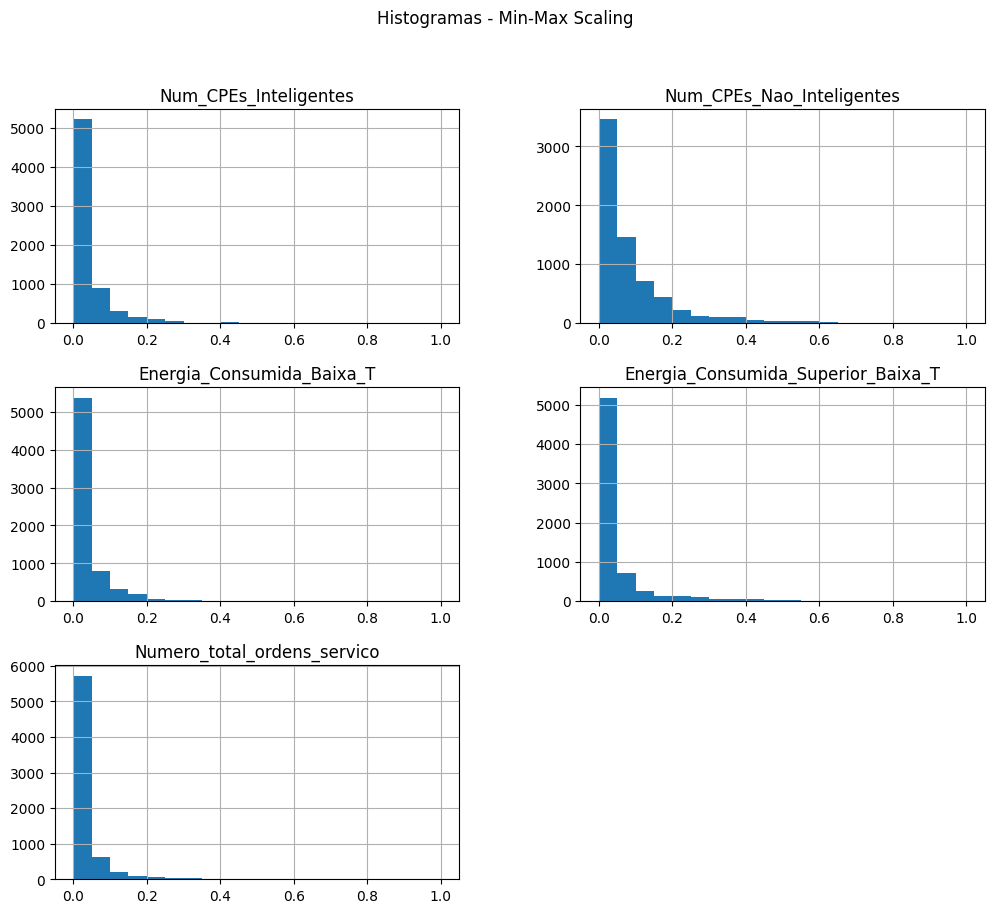

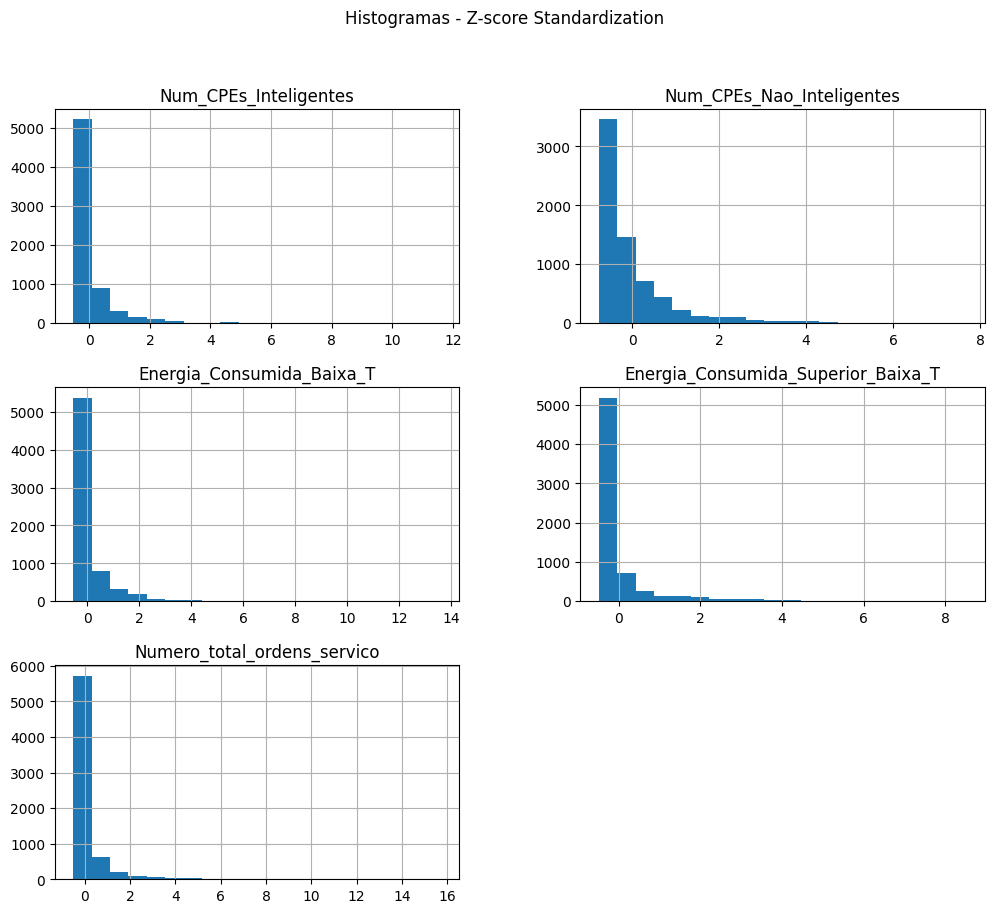

<ipython-input-80-dd20791c5493>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(minmax_scaled_df[column], label='Min-Max Scaling', shade=True)
<ipython-input-80-dd20791c5493>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(std_scaled_df[column], label='Z-score Standardization', shade=True)


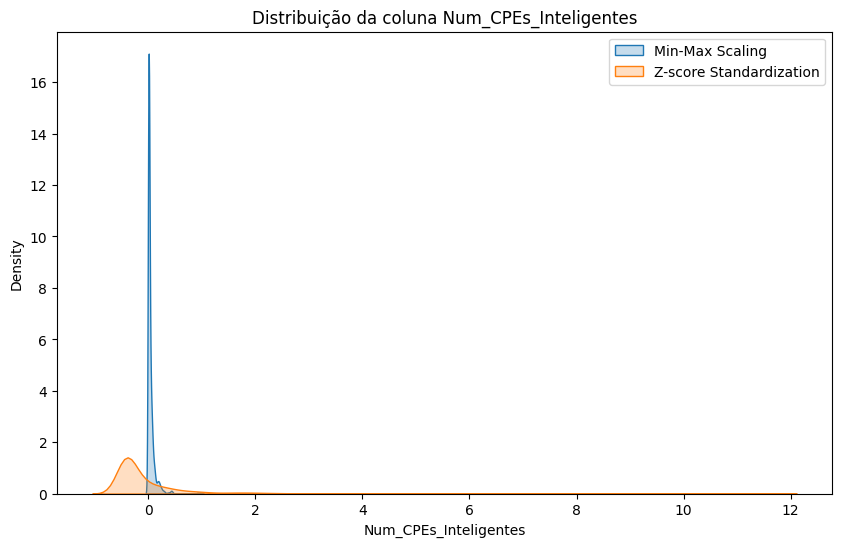

<ipython-input-80-dd20791c5493>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(minmax_scaled_df[column], label='Min-Max Scaling', shade=True)
<ipython-input-80-dd20791c5493>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(std_scaled_df[column], label='Z-score Standardization', shade=True)


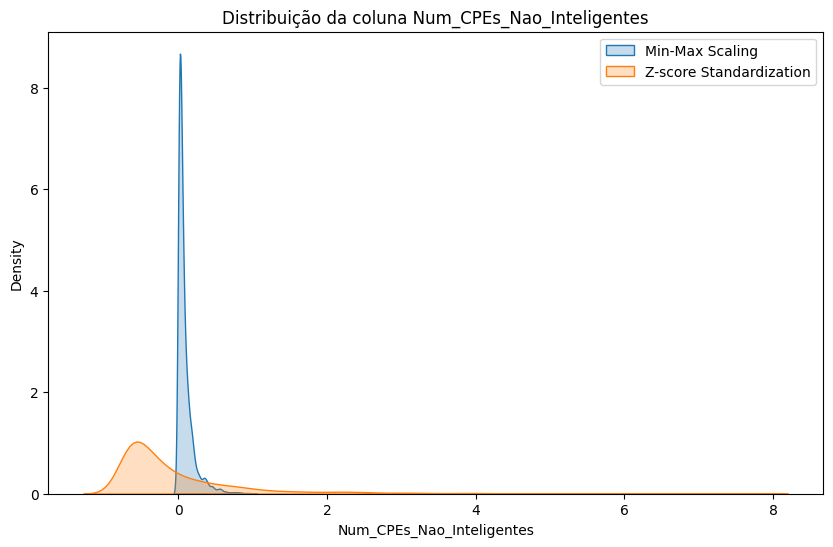

<ipython-input-80-dd20791c5493>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(minmax_scaled_df[column], label='Min-Max Scaling', shade=True)
<ipython-input-80-dd20791c5493>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(std_scaled_df[column], label='Z-score Standardization', shade=True)


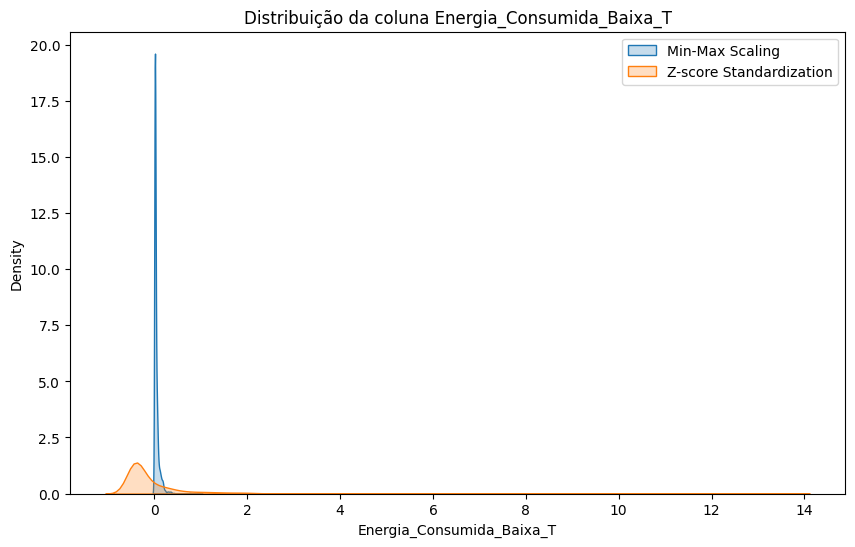

<ipython-input-80-dd20791c5493>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(minmax_scaled_df[column], label='Min-Max Scaling', shade=True)
<ipython-input-80-dd20791c5493>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(std_scaled_df[column], label='Z-score Standardization', shade=True)


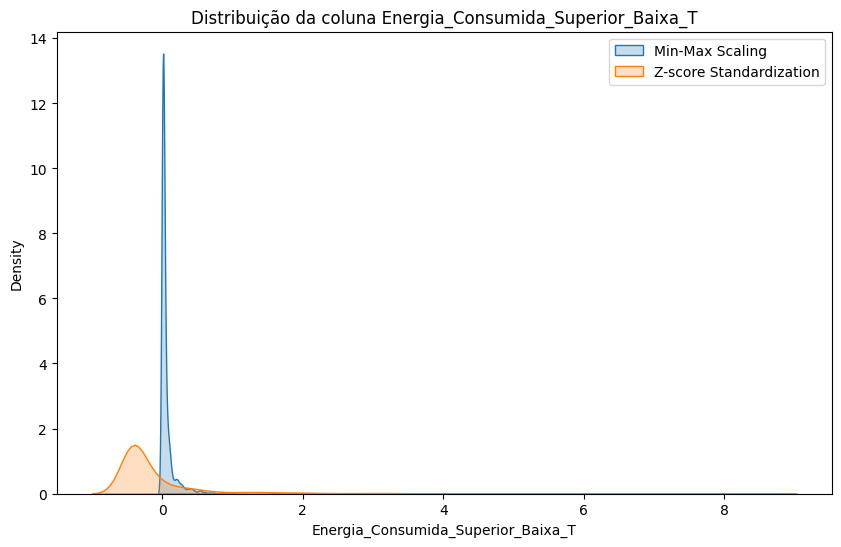

<ipython-input-80-dd20791c5493>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(minmax_scaled_df[column], label='Min-Max Scaling', shade=True)
<ipython-input-80-dd20791c5493>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(std_scaled_df[column], label='Z-score Standardization', shade=True)


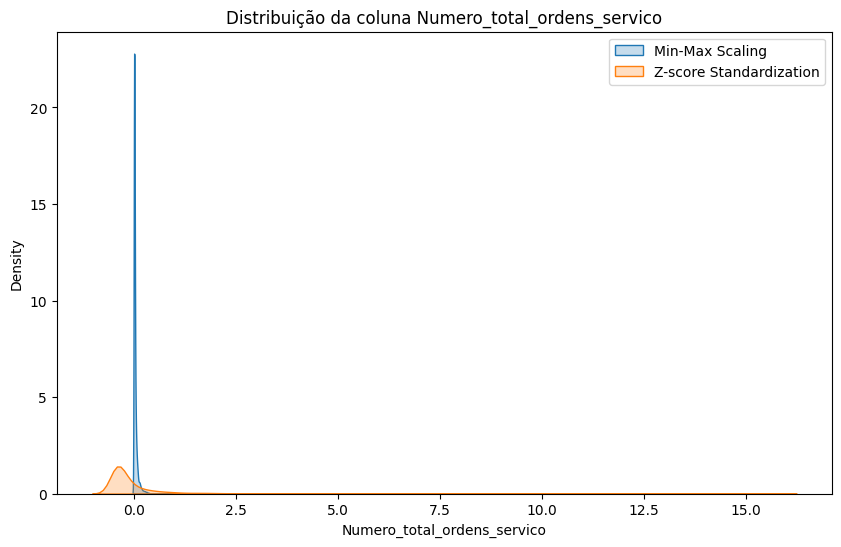

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramas para Min-Max Scaling
minmax_scaled_df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histogramas - Min-Max Scaling")
plt.show()

# Histogramas para Z-score Standardization
std_scaled_df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histogramas - Z-score Standardization")
plt.show()

# Gráficos de densidade
for column in numeric_df_to_normalize.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(minmax_scaled_df[column], label='Min-Max Scaling', shade=True)
    sns.kdeplot(std_scaled_df[column], label='Z-score Standardization', shade=True)
    plt.title(f'Distribuição da coluna {column}')
    plt.legend()
    plt.show()


##Redução de dimensionalidade

##Abordagens não- supervisionadas

K-MEANS

In [16]:
display(final_df)

,Ano,Mes,Concelho,Num_CPEs_Inteligentes,Num_CPEs_Nao_Inteligentes,Energia_Consumida_Baixa_T,Energia_Consumida_Superior_Baixa_T,Numero_total_ordens_servico
0,2022,03,Abrantes,0.033926,0.164449,0.037634,0.055115,0.009906
1,2022,03,Aguiar da Beira,0.004392,0.035236,0.005724,0.001965,0.000469
2,2022,03,Alandroal,0.003442,0.028697,0.006832,0.001550,0.001406
3,2022,03,Albergaria-a-Velha,0.013159,0.118562,0.025989,0.108356,0.003347
4,2022,03,Albufeira,0.075219,0.343493,0.109991,0.056824,0.025636
...,...,...,...,...,...,...,...,...
6820,2024,03,Vouzela,0.015016,0.013920,0.004036,0.002633,0.005489
6821,2024,03,Águeda,0.061100,0.019309,0.019987,0.031114,0.029317
6822,2024,03,Évora,0.077332,0.051360,0.031594,0.027800,0.034672
6823,2024,03,Ílhavo,0.064523,0.011423,0.017160,0.025268,0.029652


Valor da variância: 
89.60528674467379


,PC1,PC2
0,0.031578,-0.057387
1,-0.096462,-0.000943
2,-0.100084,0.003635
3,0.018215,0.008241
4,0.183031,-0.181580
...,...,...
6820,-0.102826,0.016952
6821,-0.052385,0.039194
6822,-0.023170,0.015810
6823,-0.059408,0.041611


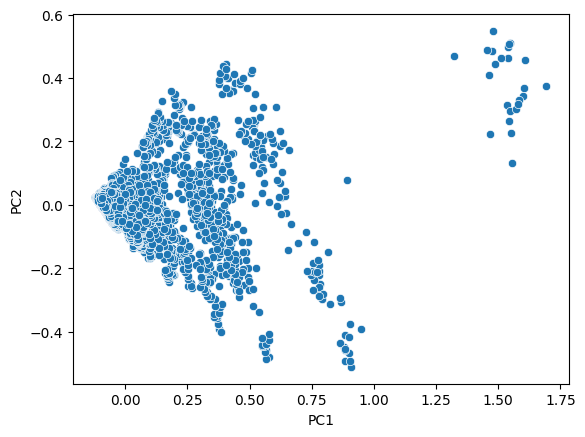

In [18]:
from sklearn.decomposition import PCA

cols_to_pca = [col for col in final_df.columns if col not in ['Ano', 'Mes', 'Concelho']]
final_to_pca_df = final_df[cols_to_pca]

pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(final_to_pca_df), index=final_to_pca_df.index, columns=['PC1', 'PC2'])
sns.scatterplot(data=pca_df, x='PC1', y='PC2');
variancia = pca.explained_variance_ratio_.sum()*100
print("Valor da variância: ")
print(variancia)

display(pca_df)

    k         wss
0   1  256.365196
1   2  117.918290
2   3   92.555327
3   4   61.529871
4   5   41.063599
5   6   32.583888
6   7   26.515996
7   8   23.229741
8   9   19.861926
9  10   17.410923


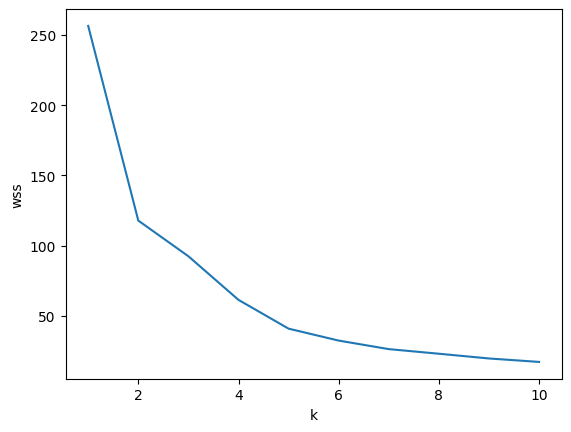

In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

k_wss = pd.DataFrame([(k, KMeans(n_clusters=k, n_init='auto').fit(pca_df).inertia_) for k in range(1, 11)], columns=['k', 'wss'])
print(k_wss)
sns.lineplot(k_wss, x='k', y='wss');

In [23]:
kmeans = KMeans(n_clusters=4, n_init='auto').fit(pca_df)
kmeans.cluster_centers_
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

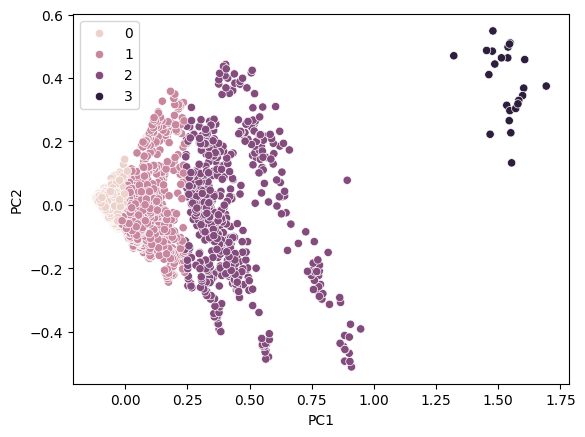

In [24]:
kmeans = KMeans(n_clusters=4, n_init='auto').fit(pca_df)
sns.scatterplot(pca_df, x='PC1', y='PC2', hue=kmeans.labels_);

In [25]:
cluster_labels = kmeans.labels_

pca_df['Cluster'] = cluster_labels
print(pca_df.head())
for cluster_id in range(4):
    cluster_members = pca_df[pca_df['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id} - Número de membros: {len(cluster_members)}")
    print(cluster_members)

        PC1       PC2  Cluster
0  0.031578 -0.057387        1
1 -0.096462 -0.000943        0
2 -0.100084  0.003635        0
3  0.018215  0.008241        1
4  0.183031 -0.181580        1
Cluster 0 - Número de membros: 4683
           PC1       PC2  Cluster
1    -0.096462 -0.000943        0
2    -0.100084  0.003635        0
5    -0.056285 -0.005870        0
7    -0.083241  0.037089        0
8    -0.105780  0.007359        0
...        ...       ...      ...
6820 -0.102826  0.016952        0
6821 -0.052385  0.039194        0
6822 -0.023170  0.015810        0
6823 -0.059408  0.041611        0
6824 -0.094246  0.022704        0

[4683 rows x 3 columns]
Cluster 1 - Número de membros: 1549
           PC1       PC2  Cluster
0     0.031578 -0.057387        1
3     0.018215  0.008241        1
4     0.183031 -0.181580        1
6     0.103073 -0.051675        1
10    0.022588  0.029615        1
...        ...       ...      ...
6800  0.079324 -0.000101        1
6803  0.064506  0.040884        1
681

##Abordagem Supervisionada - Regressão

In [ ]:
# aplicar one hot enconding no mes
# nao o fazemos no concelho pq isso aumentaria radicalmente a dimensao

df_ohenc = pd.get_dummies(merged_df, columns = ['Mes'], dtype=int)

In [ ]:
train = df_ohenc[df_ohenc.Ano != '2024'].drop(['Ano','Mes_12'], axis = 1)
test = df_ohenc[df_ohenc.Ano == '2024'].drop(['Ano','Mes_12'], axis = 1)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 0 to 6005
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Concelho                            6006 non-null   category
 1   Num_CPEs_Inteligentes               6006 non-null   int64   
 2   Num_CPEs_Nao_Inteligentes           6006 non-null   int64   
 3   Energia_Consumida_Baixa_T           6006 non-null   float64 
 4   Energia_Consumida_Superior_Baixa_T  6006 non-null   float64 
 5   Numero_total_ordens_servico         6006 non-null   int64   
 6   Mes_01                              6006 non-null   int64   
 7   Mes_02                              6006 non-null   int64   
 8   Mes_03                              6006 non-null   int64   
 9   Mes_04                              6006 non-null   int64   
 10  Mes_05                              6006 non-null   int64   
 11  Mes_06                             

In [ ]:
#drop concelho pra poder usar KNN

X_train = train.drop(['Numero_total_ordens_servico', 'Concelho'], axis=1)
X_test = test.drop(['Numero_total_ordens_servico', 'Concelho'], axis=1)

y_train = train.Numero_total_ordens_servico
y_test = test.Numero_total_ordens_servico

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 0 to 6005
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Num_CPEs_Inteligentes               6006 non-null   int64  
 1   Num_CPEs_Nao_Inteligentes           6006 non-null   int64  
 2   Energia_Consumida_Baixa_T           6006 non-null   float64
 3   Energia_Consumida_Superior_Baixa_T  6006 non-null   float64
 4   Mes_01                              6006 non-null   int64  
 5   Mes_02                              6006 non-null   int64  
 6   Mes_03                              6006 non-null   int64  
 7   Mes_04                              6006 non-null   int64  
 8   Mes_05                              6006 non-null   int64  
 9   Mes_06                              6006 non-null   int64  
 10  Mes_07                              6006 non-null   int64  
 11  Mes_08                              6006 non-nul

### Regressão com o k-NN (K-Nearest Neighbors)

Normalização de Dados

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = ['Num_CPEs_Inteligentes', 'Num_CPEs_Nao_Inteligentes', 'Energia_Consumida_Baixa_T', 'Energia_Consumida_Superior_Baixa_T']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


X_test[num_cols] = scaler.transform(X_test[num_cols])

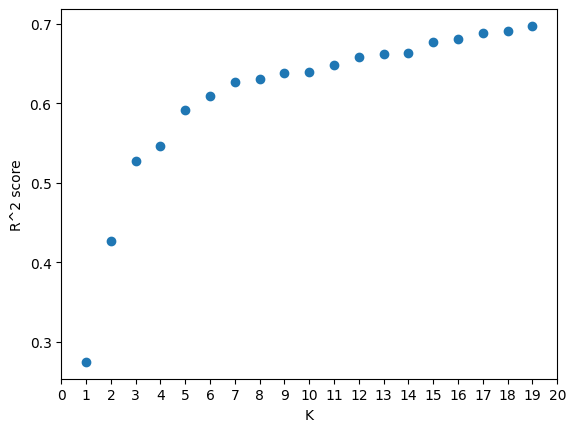

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('K')
plt.ylabel('R^2 score')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);